In [1]:
import os
import sys
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from andi_datasets.models_phenom import models_phenom
from andi_datasets.datasets_phenom import datasets_phenom
from andi_datasets.utils_trajectories import plot_trajs
from andi_datasets.utils_challenge import label_continuous_to_list, run_single_task

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
L = None  # boundary box size
N = 1000  # number of trajectory
T = 200  # length of trajectory

TypeError: '>' not supported between instances of 'float' and 'NoneType'

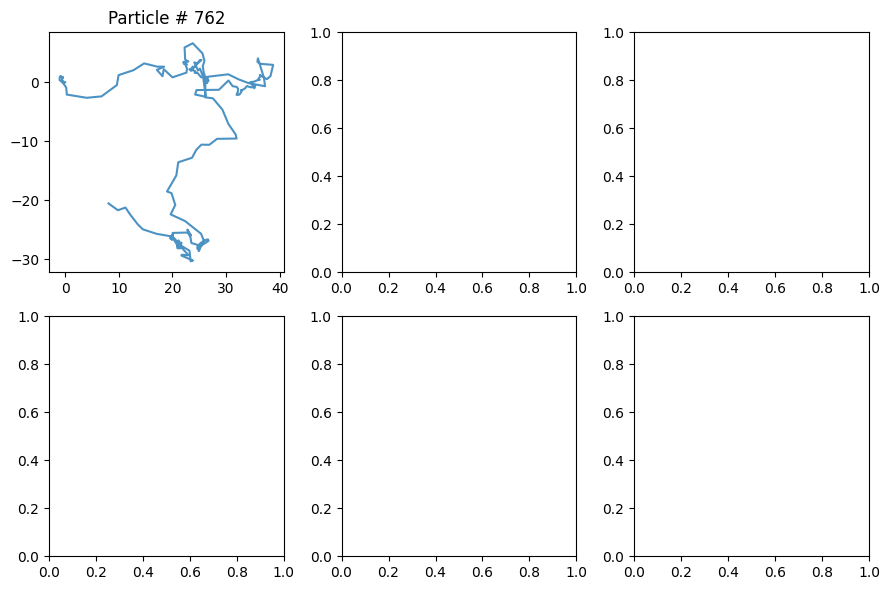

In [3]:
trajs_model, labels_model = models_phenom().multi_state(N=N,
                                                        L=L,
                                                        T=T,
                                                        alphas=[1.5, 1.5],  # Fixed alpha for each state
                                                        Ds=[[0.1, 0.0], [1.0, 0.0]],# Mean and variance of each state
                                                        M=[[0.95, 0.05], [0.05, 0.95]]  # Transition matrix
                                                       )
plot_trajs(trajs_model, L, N, num_to_plot =3)

In [2]:
def write_trxyt_trajectory(start_idx, end_idx, trajs_models, filename: str):
    pixel_microns = 0.16
    framerate = 0.01
    try:
        with open(filename, 'a', encoding="utf-8") as f:
            input = ''
            for index, trj_idx in zip(range(trajs_models.shape[1]), range(start_idx, end_idx)):
                start_pos_x = np.random.randint(10, 100)
                start_pos_y = np.random.randint(10, 100)
                xs = trajs_models[:, index, 0]
                ys = trajs_models[:, index, 1]
                xs = np.array(xs) + start_pos_x
                ys = np.array(ys) + start_pos_y
                for xpos, ypos, frame in zip(xs, ys, range(xs.shape[0])):
                    input += f'{trj_idx}\t{np.round(xpos * pixel_microns, 5)}\t{np.round(ypos * pixel_microns, 5)}\t{np.round(frame * framerate, 3)}\n'
            f.write(input)
    except Exception as e:
        print(f"Unexpected error, check the file: {filename}")
        print(e)

In [3]:
def write_trajectory_T(start_idx, end_idx, trajs_models1, trajs_models2, filename: str):
    pixel_microns = 0.16
    framerate = 0.01
    try:
        with open(filename, 'a', encoding="utf-8") as f:
            input = ''
            for index, trj_idx in zip(range(trajs_models1.shape[1]), range(start_idx, end_idx)):
                xs1 = trajs_models1[:, index, 0]
                ys1 = trajs_models1[:, index, 1]
                xs2 = trajs_models2[:, index, 0]
                ys2 = trajs_models2[:, index, 1]
                start_pos_x = np.random.randint(10, 100)
                start_pos_y = np.random.randint(10, 100)
                xs1 = np.array(xs1) + start_pos_x
                ys1 = np.array(ys1) + start_pos_y
                for xpos1, ypos1, frame1 in zip(xs1, ys1, range(xs1.shape[0])):
                    input += f'{trj_idx}\t{np.round(xpos1* pixel_microns, 5)}\t{np.round(ypos1* pixel_microns, 5)}\t{np.round(frame1 * framerate, 3)}\n'
                for xpos2, ypos2, frame2 in zip(xs2[1:], ys2[1:], list(range(xs2.shape[0]))[1:]):
                    input += f'{trj_idx}\t{np.round((xpos2+xpos1)* pixel_microns, 5)}\t{np.round((ypos2+ypos1)* pixel_microns, 5)}\t{np.round((frame2+frame1) * framerate, 3)}\n'
            f.write(input)
    except Exception as e:
        print(f"Unexpected error, check the file: {filename}")
        print(e)

In [4]:
def write_andi2_label(start_idx, end_idx, label, filename: str):
    try:
        with open(filename, 'a', encoding="utf-8") as f:
            input = f''
            for traj_idx in range(start_idx, end_idx):
                input += f'{traj_idx}\t{label}\n'
            f.write(input)
    except Exception as e:
        print(f"Unexpected error: {e}")   

In [8]:
L = None  # boundary box size
N = 1000  # number of trajectory
Ts = [8, 16, 32, 64, 128]

for T in Ts:
    trajs_model, labels_model = models_phenom().single_state(N=N,
                                                             L=L,
                                                             T=T,
                                                             alphas=0.2,
                                                             Ds=0.026,
                                                            )
    write_trxyt_trajectory(0, 1000, trajs_model, f'./HTC_validation/{T}/trajectories.trxyt')
    write_andi2_label(0, 1000, 0, f'./HTC_validation/{T}/labels.txt')

    trajs_model, labels_model = models_phenom().single_state(N=N,
                                                             L=L,
                                                             T=T,
                                                             alphas=1.0,
                                                             Ds=0.97,
                                                            )
    write_trxyt_trajectory(1000, 2000, trajs_model, f'./HTC_validation/{T}/trajectories.trxyt')
    write_andi2_label(1000, 2000, 2, f'./HTC_validation/{T}/labels.txt')


    trajs_model1, labels_model = models_phenom().single_state(N=int(N/2),
                                                             L=L,
                                                             T=int(T/2),
                                                             alphas=0.2,
                                                             Ds=0.026,
                                                            )
    trajs_model2, labels_model = models_phenom().single_state(N=int(N/2),
                                                             L=L,
                                                             T=int(T/2),
                                                             alphas=1.0,
                                                             Ds=0.97,
                                                            )
    
    write_trajectory_T(2000, 2500, trajs_model1, trajs_model2, f'./HTC_validation/{T}/trajectories.trxyt')
    write_andi2_label(2000, 2500, 1, f'./HTC_validation/{T}/labels.txt')

    trajs_model1, labels_model = models_phenom().single_state(N=int(N/2),
                                                             L=L,
                                                             T=int(T/2),
                                                             alphas=1.0,
                                                             Ds=0.97,
                                                            )
    trajs_model2, labels_model = models_phenom().single_state(N=int(N/2),
                                                             L=L,
                                                             T=int(T/2),
                                                             alphas=0.2,
                                                             Ds=0.026,
                                                            )
    
    write_trajectory_T(2500, 3000, trajs_model1, trajs_model2, f'./HTC_validation/{T}/trajectories.trxyt')
    write_andi2_label(2500, 3000, 1, f'./HTC_validation/{T}/labels.txt')

In [ ]:
L = None  # boundary box size
N = 1000  # number of trajectory
T = 200  # length of trajectory
exps = np.arange(10)
kset = [[0.03125, 1.0], [0.0625, 1.0], [0.125, 1.0], [0.25, 1.0], [0.5, 1.0], [2.0, 1.0], [4.0, 1.0], [8.0, 1.0], [16.0, 1.0], [32.0, 1.0]]
for exp, ks in zip(exps, kset):
    if not os.path.exists(f'./test/pred/track_3/exp_{exp}'):
        os.mkdir(f'./test/pred/track_3/exp_{exp}')
    if not os.path.exists(f'./test/truth/track_3/exp_{exp}'):
        os.mkdir(f'./test/truth/track_3/exp_{exp}')
    trajs_model, labels_model = models_phenom().multi_state(N=N,
                                                            L=L,
                                                            T=T,
                                                            alphas=[1.0, 1.0],  # Fixed alpha for each state
                                                            Ds=[[ks[0], 0.0], [ks[1], 0.0]],# Mean and variance of each state
                                                            M=[[0.99, 0.01], [0.01, 0.99]]  # Transition matrix
                                                           )
    write_trajectory(trajs_model, f'./test/pred/track_3/exp_{exp}/trajs_fov_0.csv')
    write_andi2_label(labels_model, f'./test/truth/track_3/exp_{exp}/fov_0.txt')

In [2]:
def write_trajectory_T(trajs_models1, trajs_models2, filename: str):
    try:
        with open(filename, 'w', encoding="utf-8") as f:
            input = 'traj_idx,frame,x,y\n'
            for index in range(trajs_models1.shape[1]):
                xs1 = trajs_model1[:, index, 0]
                ys1 = trajs_model1[:, index, 1]
                xs2 = trajs_model2[:, index, 0]
                ys2 = trajs_model2[:, index, 1]
                for xpos1, ypos1, frame1 in zip(xs1, ys1, range(xs1.shape[0])):
                    input += f'{index},{frame1},{xpos1},{ypos1}\n'
                for xpos2, ypos2, frame2 in zip(xs2[1:], ys2[1:], list(range(xs2.shape[0]))[1:]):
                    input += f'{index},{frame2+frame1},{xpos2+xpos1},{ypos2+ypos1}\n'
            f.write(input)
    except Exception as e:
        print(f"Unexpected error, check the file: {filename}")
        print(e)

In [3]:
def write_andi2_label_T(model_labels1, t, model_labels2, filename: str):
    try:
        with open(filename, 'w', encoding="utf-8") as f:
            input = f''
            for traj_idx in range(model_labels1.shape[1]):
                input += f'{traj_idx}'
                changepoints1, alphas1, Ds1, state_nums1 = label_continuous_to_list(model_labels1[:, traj_idx, :])
                changepoints2, alphas2, Ds2, state_nums2 = label_continuous_to_list(model_labels2[:, traj_idx, :])
                for cp, alpha, D, state_num in zip(changepoints1, alphas1, Ds1, state_nums1):
                    input += f',{D},{alpha},{state_num},{cp}'
                for cp, alpha, D, state_num in zip(changepoints2, alphas2, Ds2, state_nums2):
                    input += f',{D},{alpha},{state_num},{cp + t - 1}'
                input += f'\n'
            f.write(input)
    except Exception as e:
        print(f"Unexpected error: {e}")

In [9]:
def write_andi2_label_T2(model_labels1, t, model_labels2, filename: str):
    try:
        with open(filename, 'w', encoding="utf-8") as f:
            input = f''
            for traj_idx in range(model_labels1.shape[1]):
                input += f'{traj_idx}'
                changepoints1, alphas1, Ds1, state_nums1 = label_continuous_to_list(model_labels1[:, traj_idx, :])
                for cp, alpha, D, state_num in zip(changepoints1, alphas1, Ds1, state_nums1):
                    input += f',{D},{alpha},{state_num},{cp*2}'
                input += f'\n'
            f.write(input)
    except Exception as e:
        print(f"Unexpected error: {e}")

In [14]:
test_numb = f'test5'

if not os.path.exists(f'./{test_numb}'):
    os.mkdir(f'./{test_numb}')
if not os.path.exists(f'./{test_numb}/pred'):
    os.mkdir(f'./{test_numb}/pred')
if not os.path.exists(f'./{test_numb}/truth'):
    os.mkdir(f'./{test_numb}/truth')
if not os.path.exists(f'./{test_numb}/pred/track_2'):
    os.mkdir(f'./{test_numb}/pred/track_2')
if not os.path.exists(f'./{test_numb}/truth/track_2'):
    os.mkdir(f'./{test_numb}/truth/track_2')

L = None  # boundary box size
N = 1000  # number of trajectory
exps = np.arange(10)

prefixed_alpha1 = 1.0 
prefixed_K1 = 1.0
prefixed_alpha2 = 1.5
prefixed_K2 = 5
Ts = [5, 8, 12, 16, 24, 32, 48]

for exp, T in zip(exps, Ts):
    if not os.path.exists(f'./{test_numb}/pred/track_2/exp_{exp}'):
        os.mkdir(f'./{test_numb}/pred/track_2/exp_{exp}')
    if not os.path.exists(f'./{test_numb}/truth/track_2/exp_{exp}'):
        os.mkdir(f'./{test_numb}/truth/track_2/exp_{exp}')
    for i in range(10):
        trajs_model1, labels_model1 = models_phenom().single_state(N=int(N/2/10),
                                                                   L=L,
                                                                   T=T,
                                                                   alphas=prefixed_alpha1,  # Fixed alpha for each state
                                                                   Ds=prefixed_K1)
        trajs_model2, labels_model2 = models_phenom().single_state(N=int(N/2/10),
                                                                   L=L,
                                                                   T=T+1,
                                                                   alphas=prefixed_alpha2,  # Fixed alpha for each state
                                                                   Ds=prefixed_K2)
        write_trajectory_T(trajs_model1, trajs_model2, f'./{test_numb}/pred/track_2/exp_{exp}/fov_{i}.csv')
        write_andi2_label_T(labels_model1, T, labels_model2, f'./{test_numb}/truth/track_2/exp_{exp}/fov_{i}.txt')
    for i in range(10, 20):
        trajs_model1, labels_model1 = models_phenom().single_state(N=int(N/2/10),
                                                                   L=L,
                                                                   T=T,
                                                                   alphas=prefixed_alpha1,  # Fixed alpha for each state
                                                                   Ds=prefixed_K1)
        trajs_model2, labels_model2 = models_phenom().single_state(N=int(N/2/10),
                                                                   L=L,
                                                                   T=T+1,
                                                                   alphas=prefixed_alpha1,  # Fixed alpha for each state
                                                                   Ds=prefixed_K1)
        write_trajectory_T(trajs_model1, trajs_model2, f'./{test_numb}/pred/track_2/exp_{exp}/fov_{i}.csv')
        write_andi2_label_T2(labels_model1, T, labels_model2, f'./{test_numb}/truth/track_2/exp_{exp}/fov_{i}.txt')

In [11]:
import os
import sys
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from andi_datasets.models_phenom import models_phenom
from andi_datasets.datasets_phenom import datasets_phenom
from andi_datasets.utils_trajectories import plot_trajs
from andi_datasets.utils_challenge import label_continuous_to_list, run_single_task

%load_ext autoreload
%autoreload 2
    
dummy, metrics = run_single_task([0], 2, './test/pred', './test/truth')
metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Experiment  num_trajs   RMSE CP    JSC CP     alpha          D     state
0           0       1000  4.509250  0.041475  1.758312  96.076299  0.179581
1           0        100  3.810512  0.343249  0.136855   0.000164  1.000000
2           0        100  3.712723  0.342282  0.140780   0.000194  1.000000
3           0        100  3.582670  0.376238  0.119350   0.000200  1.000000
4           0        100  3.990699  0.390501  0.122609   0.000194  1.000000
5           0        100  3.880149  0.349515  0.126282   0.000174  1.000000
6           0        100  3.510353  0.371703  0.119562   0.000214  1.000000
7           0        100  3.642862  0.385922  0.126028   0.000200  1.000000
8           0        100  4.192681  0.323326  0.134275   0.000179  1.000000
9           0        100  3.913499  0.411765  0.128174   0.000229  1.000000

In [7]:
alphaset = np.array([[0.1, 1.0], [0.3, 1.0], [0.5, 1.0], [0.7, 1.0], [0.9, 1.0], [1.1, 1.0], [1.3, 1.0], [1.5, 1.0], [1.7, 1.0], [1.9, 1.0]])
kset = np.array([[0.03125, 1.0], [0.0625, 1.0], [0.125, 1.0], [0.25, 1.0], [0.5, 1.0], [2.0, 1.0], [4.0, 1.0], [8.0, 1.0], [16.0, 1.0], [32.0, 1.0]])

graph_data = {}
for track in [2, 3]:
    graph_data[track] = {}
    all_rmses = []
    all_jscs = []
    all_maes = []
    all_msles = []
    for exp in range(10):
        dummy, metrics = run_single_task([exp], track, './test/pred', './test/truth')
        rmses = np.array(metrics['RMSE CP'])
        jscs = np.array(metrics['JSC CP'])
        maes = np.array(metrics['alpha'])
        msle = np.array(metrics['D'])
        all_rmses.append(rmses)
        all_jscs.append(jscs)
        all_maes.append(maes)
        all_msles.append(msle)
    graph_data[track]['all_rmses'] = np.array(all_rmses)
    graph_data[track]['all_jscs'] = np.array(all_jscs)
    graph_data[track]['all_maes'] = np.array(all_maes)
    graph_data[track]['all_msles'] = np.log10(np.array(all_msles))
            

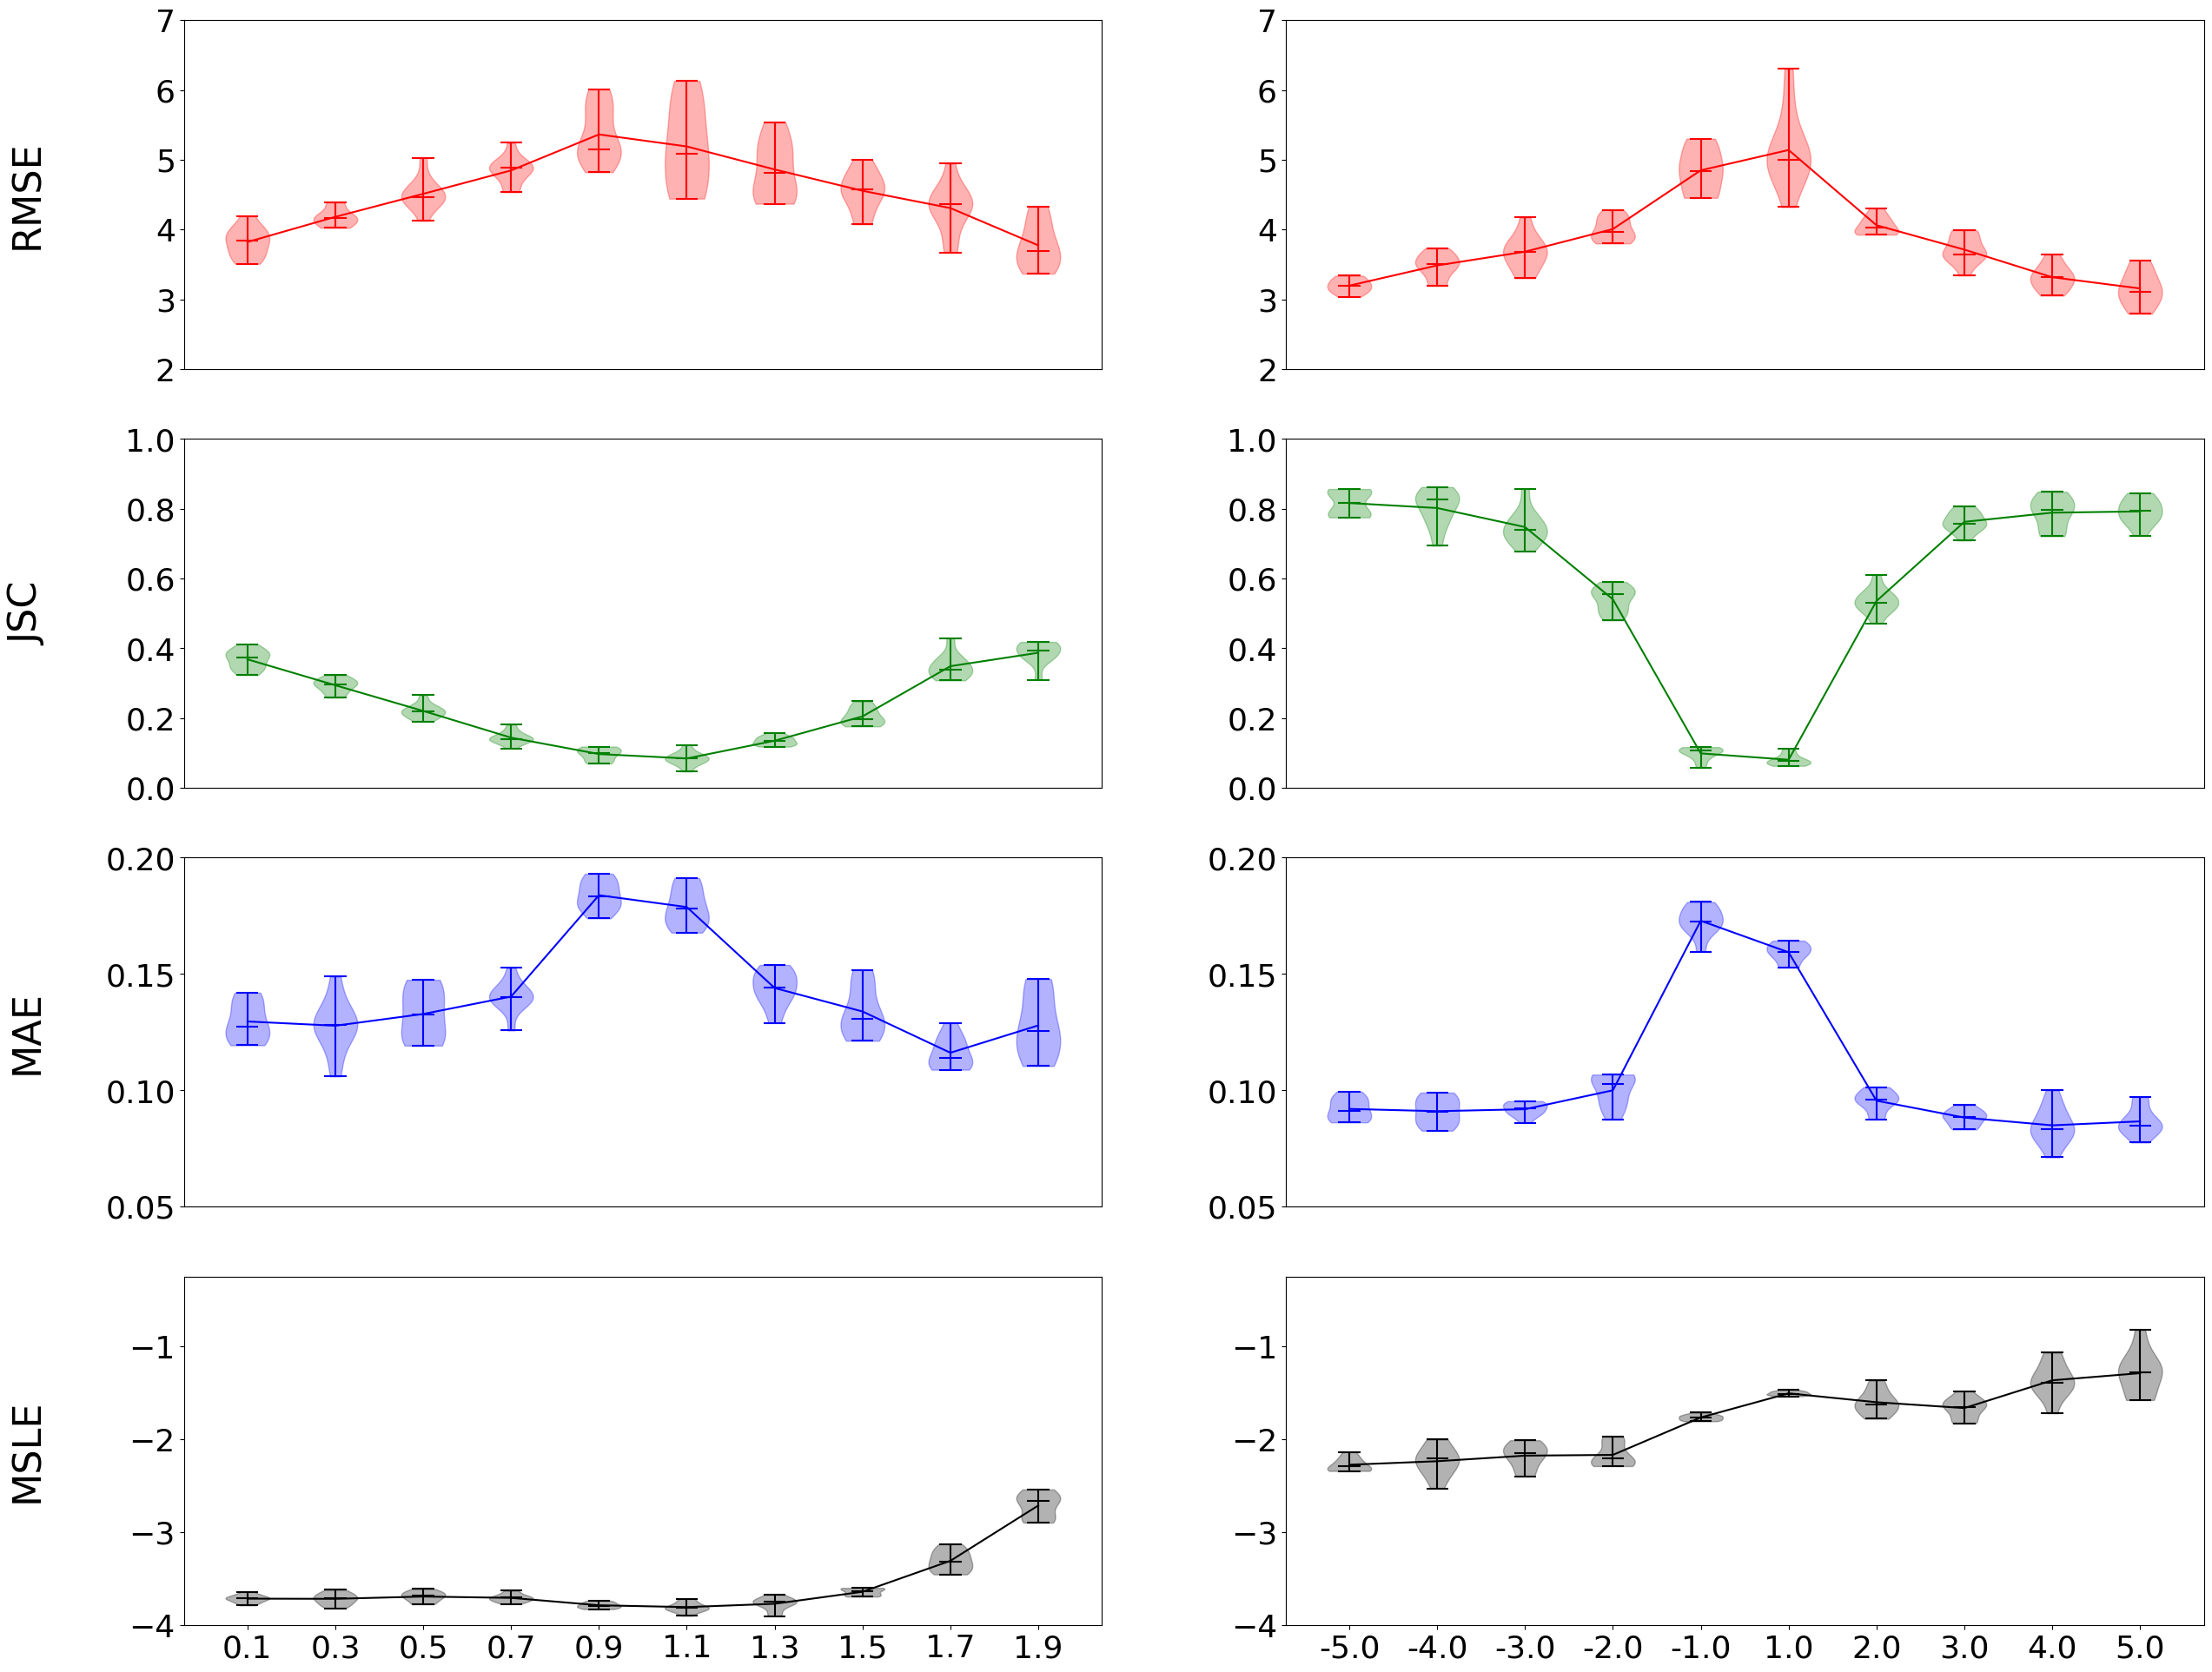

In [8]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(30, 24))

import matplotlib as mpl
label_size = 26
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

# generate some random test dat

for track_idx, track_nb in enumerate([2,3]):
    for idx, (data_, color, metric) in enumerate(zip(['all_rmses', 'all_jscs', 'all_maes', 'all_msles'], ['red', 'green', 'blue', 'black'],
                                            ['RMSE', 'JSC', 'MAE', 'MSLE'])):
        violin_parts = axs[idx][track_idx].violinplot(graph_data[track_nb][data_].T,
                          showmeans=False,
                          showmedians=True)
        axs[idx][track_idx].plot(np.arange(10)+1, graph_data[track_nb][data_].mean(axis=1), c=color)
        
        for pc in violin_parts['bodies']:
            pc.set_facecolor(color)
            pc.set_edgecolor(color)
        
        for partname in ('cbars','cmins','cmaxes','cmedians'):
            violin_parts[partname].set_colors(color)
        axs[idx][0].set_ylabel(metric, fontsize=32)
        axs[idx][track_idx].yaxis.set_label_coords(-0.15,0.5)
        
        if idx == 3 and track_idx == 0:
            axs[idx][track_idx].set_xticks(np.arange(10)+1, labels=alphaset[:,0])
        elif idx== 3 and track_idx == 1:
            axs[idx][track_idx].set_xticks(np.arange(10)+1, labels=np.log2(kset[:,0]))
        else:
            axs[idx][track_idx].set_xticks([])

        """
        if metric =='MSLE':
            axs[idx][track_idx].set_yscale('log')
            axs[idx][track_idx].set_yticks([0.0005, 0.03])
            axs[idx][track_idx].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        """
        
        if metric=='RMSE':
            axs[idx][track_idx].set_ylim([2, 7])
        elif metric=='JSC':
            axs[idx][track_idx].set_ylim([0, 1.0])
        elif metric=='MAE':
            axs[idx][track_idx].set_ylim([0.05, 0.2])
        else:
            axs[idx][track_idx].set_ylim([-4, -0.25])
plt.savefig('./metrics.png', transparent=True)

In [23]:
import os
import sys
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from andi_datasets.models_phenom import models_phenom
from andi_datasets.datasets_phenom import datasets_phenom
from andi_datasets.utils_trajectories import plot_trajs
from andi_datasets.utils_challenge import label_continuous_to_list, run_single_task

%load_ext autoreload
%autoreload 2
    
dummy, metrics = run_single_task([0, 1, 2, 3, 4, 5, 6], 2, './test3/pred', './test3/truth')
metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Experiment  num_trajs  RMSE CP  JSC CP     alpha         D  state
0             0         50      0.0    0.88  0.300201  0.070001    0.0
1             0         50      0.0    0.92  0.350547  0.046378    0.0
2             0         50      0.0    0.89  0.337853  0.049663    0.0
3             0         50      0.0    0.91  0.326073  0.051108    0.0
4             0         50      0.0    0.92  0.348579  0.052084    0.0
..          ...        ...      ...     ...       ...       ...    ...
135           6         50     10.0    1.00  0.097156  0.002158    0.0
136           6         50     10.0    1.00  0.089293  0.002809    0.0
137           6         50     10.0    1.00  0.077929  0.004574    0.0
138           6         50     10.0    1.00  0.095629  0.004272    0.0
139           6         50     10.0    1.00  0.084146  0.003736    0.0

[140 rows x 7 columns]

In [54]:
dummy, metrics = run_single_task([0], 2, './test4/pred', './test4/truth')
metrics

/home/junwoo/SPT_a/analysis_modeling/andi_datasets/utils_challenge.py:1215: SyntaxWarning: invalid escape sequence '\m'
  '''


Experiment  num_trajs   RMSE CP  JSC CP     alpha         D  state
0            0         50  0.063823    0.53  0.236335  0.156156    0.0
1            0         50  0.339090    0.53  0.213581  0.154628    0.0
2            0         50  0.725326    0.52  0.200613  0.141258    0.0
3            0         50  0.445948    0.56  0.259076  0.124268    0.0
4            0         50  0.121550    0.53  0.237482  0.145846    0.0
5            0         50  0.685366    0.55  0.232483  0.147883    0.0
6            0         50  0.461191    0.52  0.234967  0.145898    0.0
7            0         50  0.579945    0.51  0.242594  0.145975    0.0
8            0         50  0.465735    0.51  0.269849  0.145404    0.0
9            0         50  0.437922    0.53  0.207421  0.146608    0.0
10           0         50  0.809469    1.00  0.207571  0.027579    0.0
11           0         50  0.544700    1.00  0.246376  0.024226    0.0
12           0         50  0.175235    1.00  0.246444  0.047783    0.0
13           0         50  0.139392    1.00  0.201182  0.035439    0.0
14           0         50  0.968082    1.00  0.250804  0.033617    0.0
15           0         50  0.863368    1.00  0.216367  0.034384    0.0
16           0         50  0.069623    1.00  0.209081  0.042563    0.0
17           0         50  0.113642    1.00  0.219171  0.032257    0.0
18           0         50  0.384362    1.00  0.198345  0.030062    0.0
19           0         50  0.444306    1.00  0.246070  0.034096    0.0

In [57]:
graph_data = {}
for track in ['test3', 'test4']:
    graph_data[track] = {}
    all_rmses = []
    all_jscs = []
    all_maes = []
    all_msles = []
    for exp in range(7):
        dummy, metrics = run_single_task([exp], 2, f'./{track}/pred', f'./{track}/truth')
        rmses = np.array(metrics['RMSE CP'])
        jscs = np.array(metrics['JSC CP'])
        maes = np.array(metrics['alpha'])
        msle = np.array(metrics['D'])
        all_rmses.append(rmses)
        all_jscs.append(jscs)
        all_maes.append(maes)
        all_msles.append(msle)
    graph_data[track]['all_rmses'] = np.array(all_rmses)
    graph_data[track]['all_jscs'] = np.array(all_jscs)
    graph_data[track]['all_maes'] = np.array(all_maes)
    graph_data[track]['all_msles'] = np.log10(np.array(all_msles))
            

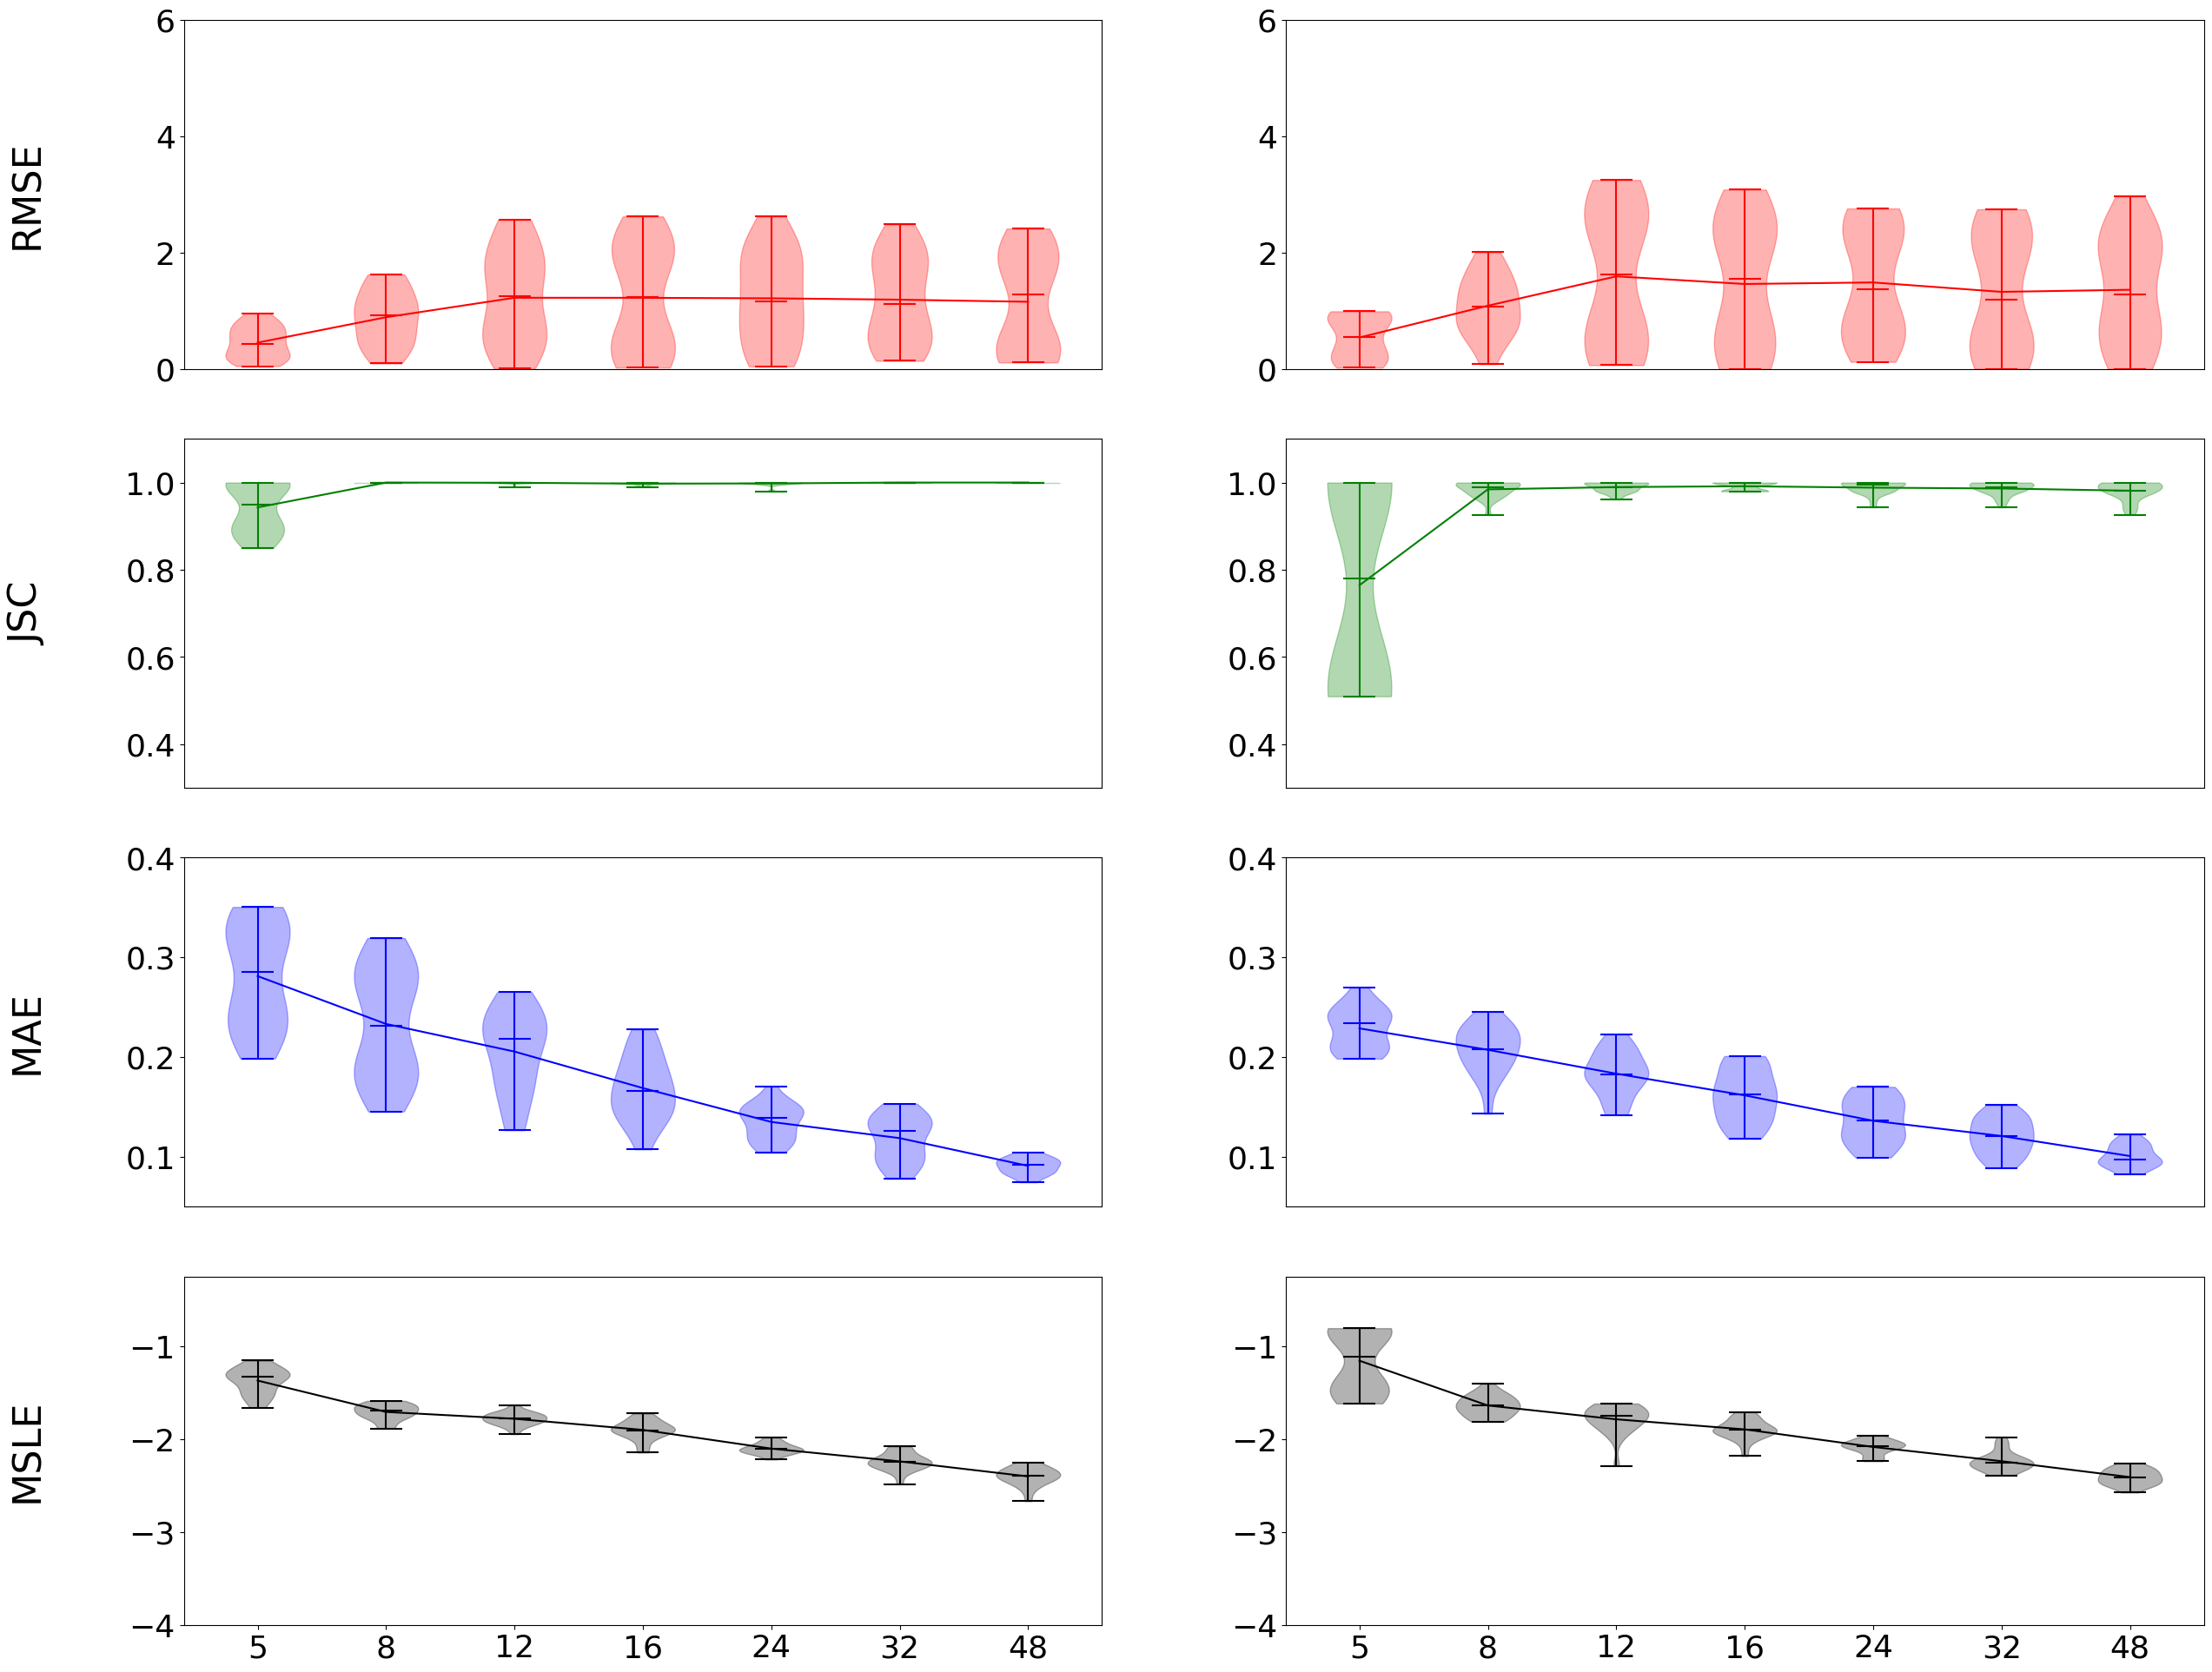

In [65]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(30, 24))

import matplotlib as mpl
label_size = 26
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

# generate some random test dat

for track_idx, track_nb in enumerate(['test3', 'test4']):
    for idx, (data_, color, metric) in enumerate(zip(['all_rmses', 'all_jscs', 'all_maes', 'all_msles'], ['red', 'green', 'blue', 'black'],
                                            ['RMSE', 'JSC', 'MAE', 'MSLE'])):
        violin_parts = axs[idx][track_idx].violinplot(graph_data[track_nb][data_].T,
                          showmeans=False,
                          showmedians=True)
        axs[idx][track_idx].plot(np.arange(7)+1, graph_data[track_nb][data_].mean(axis=1), c=color)
        
        for pc in violin_parts['bodies']:
            pc.set_facecolor(color)
            pc.set_edgecolor(color)
        
        for partname in ('cbars','cmins','cmaxes','cmedians'):
            violin_parts[partname].set_colors(color)
        axs[idx][0].set_ylabel(metric, fontsize=32)
        axs[idx][track_idx].yaxis.set_label_coords(-0.15,0.5)
        
        if idx == 3 and track_idx == 0:
            axs[idx][track_idx].set_xticks(np.arange(7)+1, labels=np.array(Ts))
        elif idx== 3 and track_idx == 1:
            axs[idx][track_idx].set_xticks(np.arange(7)+1, labels=np.array(Ts))
        else:
            axs[idx][track_idx].set_xticks([])

        """
        if metric =='MSLE':
            axs[idx][track_idx].set_yscale('log')
            axs[idx][track_idx].set_yticks([0.0005, 0.03])
            axs[idx][track_idx].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
        """
        
        if metric=='RMSE':
            axs[idx][track_idx].set_ylim([0, 6])
        elif metric=='JSC':
            axs[idx][track_idx].set_ylim([0.3, 1.1])
        elif metric=='MAE':
            axs[idx][track_idx].set_ylim([0.05, 0.4])
        else:
            axs[idx][track_idx].set_ylim([-4, -0.25])
plt.savefig('metrics2.png', transparent=True)